In [542]:
import numpy as np

In [543]:
# https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html

In [544]:
class Linear:
    def __init__(self, num_in, num_out, use_bias = True) -> None:
        self.use_bias = use_bias
        self.num_in = num_in
        self.num_out = num_out
        self.matr = np.random.normal(0, 1., (num_in + (1 if use_bias else 0), num_out))
        self.grads = np.zeros_like(self.matr)
        self.last_xs = None

    def get_grad(self, upstream_resp_loss: np.ndarray) -> np.ndarray:
        # divvy up the blame!
        # except now, just do it with the last inputs

        # the loss 'attributed' that we will pass up, (the loss 'attributed' to inputs) is proportonial to the weight mat
        if not self.use_bias:
            dloss_din = upstream_resp_loss @ np.sign(self.matr.T)
        else:
            # chop off the bias!
            dloss_din = upstream_resp_loss @ np.sign(self.matr[:-1, :].T)

        # the loss 'attributed' to the weights is directly proportional to the inputs we recieved
        dloss_dweights = self.last_xs.T @ upstream_resp_loss
        # print(f"{self.last_xs.T=}")
        # print(f"{upstream_resp_loss=}")
        # print(f"")
        # print(f"{dloss_dweights=}")
        print(f"============")
        print(f"{upstream_resp_loss=}")
        print(f"{np.sign(self.matr.T)=}")
        print(f"")
        print(f"{dloss_din=}")
        print(f"{np.sign(dloss_din)=}")

        print(f"")
        print(f"{self.last_xs=}")
        print(f"{upstream_resp_loss=}")
        print(f"{dloss_dweights=}")

        print(f"")

        assert self.grads.shape == dloss_dweights.shape
        self.grads = np.sign(dloss_dweights)

        return np.sign(dloss_din)

    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        # fix xs, if we need bias
        fixed_xs = xs
        if self.use_bias:
            fixed_xs = np.hstack((fixed_xs, np.ones((fixed_xs.shape[0], 1))))
        
        if not no_record:
            self.last_xs = fixed_xs
        
        return fixed_xs @ np.sign(self.matr)

In [545]:
class LinearPercepFused(Linear):
    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        outp = super().forward(xs, no_record)
        return np.where(outp > 0., 1., 0.)

In [546]:
class MSELoss:
    def __init__(self) -> None:
        self.last_diffs = None

    def get_grad(self) -> np.ndarray:
        return np.sign(self.last_diffs) * (np.abs(self.last_diffs) > .1)
        # return 2.*self.last_diffs/len(self.last_diffs)

    def forward(self, y: np.ndarray, y_exp) -> np.ndarray:
        self.last_diffs = y - y_exp
        return np.mean(self.last_diffs**2)

In [547]:
# xs = np.linspace(-10, 10, 1000)
# ys = xs*10 + 2
# xs += np.random.normal(0.,.1, len(xs))

# xs = xs.reshape(-1, 1)
# ys = ys.reshape(-1, 1)

xs = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
# ys = np.array([[1.], [1.], [1.], [0.]])
# ys = np.array([[0.], [0.], [0.], [1.]])
ys = np.array([[0.], [1.], [1.], [0.]])
# ys = np.array([[0.], [0.], [1.], [0.]])


In [548]:
xs_repeat = xs.repeat(10, 0)
ys_repeat = ys.repeat(10, 0)
ys_repeat += np.random.normal(0, .01, size=ys_repeat.shape)

In [549]:
import matplotlib.pyplot as plt

In [550]:
LR = .01

In [551]:
from tqdm import tqdm

In [552]:
def get_random_range(lenx, seq_len):
    start_i = np.random.randint(0, lenx-seq_len)
    return start_i, start_i + seq_len

In [553]:
def shuffle(arrs):
    for arr in arrs:
        assert len(arr) == len(arrs[0]), "All arrays should be the same length"
    idxs = np.arange(0, len(arr))
    np.random.shuffle(idxs)
    reindexed = [arr[idxs] for arr in arrs]
    return reindexed

In [554]:
get_random_range(len(xs_repeat), 10)

(23, 33)

In [555]:
xs_repeat_shuff, ys_repeat_shuff = shuffle([xs_repeat, ys_repeat])

 15%|█▌        | 457/3000 [00:00<00:01, 2293.64it/s]

loss=1.0066342732335785
pass_back_grad=array([[-1.]])
upstream_resp_loss=array([[-1.]])
np.sign(self.matr.T)=array([[-1., -1., -1.,  1., -1., -1.]])

dloss_din=array([[ 1.,  1.,  1., -1.,  1.]])
np.sign(dloss_din)=array([[ 1.,  1.,  1., -1.,  1.]])

self.last_xs=array([[0., 1., 1., 0., 0., 1.]])
upstream_resp_loss=array([[-1.]])
dloss_dweights=array([[ 0.],
       [-1.],
       [-1.],
       [ 0.],
       [ 0.],
       [-1.]])

pass_back_grad=array([[ 1.,  1.,  1., -1.,  1.]])
upstream_resp_loss=array([[ 1.,  1.,  1., -1.,  1.]])
np.sign(self.matr.T)=array([[ 1., -1.,  1.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1., -1.],
       [-1., -1.,  1.]])

dloss_din=array([[-1., -1.]])
np.sign(dloss_din)=array([[-1., -1.]])

self.last_xs=array([[0., 1., 1.]])
upstream_resp_loss=array([[ 1.,  1.,  1., -1.,  1.]])
dloss_dweights=array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1., -1.,  1.],
       [ 1.,  1.,  1., -1.,  1.]])

pass_back_grad=array([[-1., -1.]])
loss=1.7

 47%|████▋     | 1403/3000 [00:00<00:00, 2355.64it/s]

loss=3.7489644214593612e-06
pass_back_grad=array([[-0.]])
upstream_resp_loss=array([[-0.]])
np.sign(self.matr.T)=array([[-1., -1., -1.,  1., -1.,  1.]])

dloss_din=array([[0., 0., 0., 0., 0.]])
np.sign(dloss_din)=array([[0., 0., 0., 0., 0.]])

self.last_xs=array([[0., 1., 0., 1., 1., 1.]])
upstream_resp_loss=array([[-0.]])
dloss_dweights=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

pass_back_grad=array([[0., 0., 0., 0., 0.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
np.sign(self.matr.T)=array([[ 1., -1., -1.],
       [-1.,  1.,  1.],
       [ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.]])

dloss_din=array([[0., 0.]])
np.sign(dloss_din)=array([[0., 0.]])

self.last_xs=array([[0., 0., 1.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
dloss_dweights=array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

pass_back_grad=array([[0., 0.]])
loss=4.0130532543214114e-05
pass_back_grad=array([[-0.]]

 71%|███████▏  | 2140/3000 [00:00<00:00, 2429.31it/s]

loss=4.007886243505494e-06
pass_back_grad=array([[-0.]])
upstream_resp_loss=array([[-0.]])
np.sign(self.matr.T)=array([[-1., -1., -1.,  1., -1.,  1.]])

dloss_din=array([[0., 0., 0., 0., 0.]])
np.sign(dloss_din)=array([[0., 0., 0., 0., 0.]])

self.last_xs=array([[0., 1., 0., 1., 1., 1.]])
upstream_resp_loss=array([[-0.]])
dloss_dweights=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

pass_back_grad=array([[0., 0., 0., 0., 0.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
np.sign(self.matr.T)=array([[ 1., -1., -1.],
       [-1.,  1.,  1.],
       [ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.]])

dloss_din=array([[0., 0.]])
np.sign(dloss_din)=array([[0., 0.]])

self.last_xs=array([[0., 0., 1.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
dloss_dweights=array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

pass_back_grad=array([[0., 0.]])
loss=1.4140615242471395e-05
pass_back_grad=array([[0.]])


 88%|████████▊ | 2626/3000 [00:01<00:00, 2415.86it/s]

loss=1.894825340373163e-07
pass_back_grad=array([[-0.]])
upstream_resp_loss=array([[-0.]])
np.sign(self.matr.T)=array([[-1., -1., -1.,  1., -1.,  1.]])

dloss_din=array([[0., 0., 0., 0., 0.]])
np.sign(dloss_din)=array([[0., 0., 0., 0., 0.]])

self.last_xs=array([[0., 1., 0., 1., 0., 1.]])
upstream_resp_loss=array([[-0.]])
dloss_dweights=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

pass_back_grad=array([[0., 0., 0., 0., 0.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
np.sign(self.matr.T)=array([[ 1., -1., -1.],
       [-1.,  1.,  1.],
       [ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.]])

dloss_din=array([[0., 0.]])
np.sign(dloss_din)=array([[0., 0.]])

self.last_xs=array([[0., 1., 1.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
dloss_dweights=array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

pass_back_grad=array([[0., 0.]])
loss=3.691514342830269e-05
pass_back_grad=array([[0.]])
u

100%|██████████| 3000/3000 [00:01<00:00, 2382.02it/s]

loss=1.912607683875466e-06
pass_back_grad=array([[0.]])
upstream_resp_loss=array([[0.]])
np.sign(self.matr.T)=array([[-1., -1., -1.,  1., -1.,  1.]])

dloss_din=array([[0., 0., 0., 0., 0.]])
np.sign(dloss_din)=array([[0., 0., 0., 0., 0.]])

self.last_xs=array([[0., 1., 1., 1., 0., 1.]])
upstream_resp_loss=array([[0.]])
dloss_dweights=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

pass_back_grad=array([[0., 0., 0., 0., 0.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
np.sign(self.matr.T)=array([[ 1., -1., -1.],
       [-1.,  1.,  1.],
       [ 1.,  1., -1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.]])

dloss_din=array([[0., 0.]])
np.sign(dloss_din)=array([[0., 0.]])

self.last_xs=array([[1., 1., 1.]])
upstream_resp_loss=array([[0., 0., 0., 0., 0.]])
dloss_dweights=array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

pass_back_grad=array([[0., 0.]])
loss=0.00010094693480577397
pass_back_grad=array([[-0.]])
up

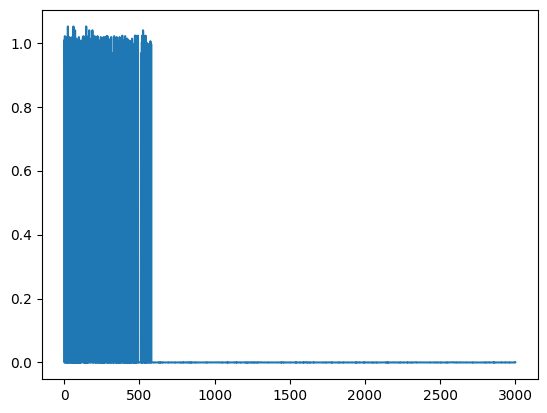

In [556]:
lin1 = LinearPercepFused(2, 5, use_bias=True)
lin2 = LinearPercepFused(5, 1, use_bias=True)
lossf = MSELoss()

losses = []
for _ in tqdm(range(3000)):
    starti, endi = get_random_range(len(xs_repeat_shuff), 1)
    out_l1 = lin1.forward(xs_repeat_shuff[starti:endi])
    out = lin2.forward(out_l1)

    loss = lossf.forward(out, ys_repeat_shuff[starti:endi])
    print(f"{loss=}")
    
    pass_back_grad = lossf.get_grad()
    print(f"{pass_back_grad=}")
    pass_back_grad = lin2.get_grad(pass_back_grad)
    print(f"{pass_back_grad=}")
    pass_back_grad = lin1.get_grad(pass_back_grad)
    print(f"{pass_back_grad=}")

    lin1.matr += lin1.grads*-LR
    lin2.matr += lin2.grads*-LR
    losses.append(loss)
import matplotlib.pyplot as plt
plt.plot(losses)

In [557]:
# lin1 = LinearPercepFused(2, 5, use_bias=True)
# lin2 = LinearPercepFused(5, 5, use_bias=True)
# lin3 = LinearPercepFused(5, 1, use_bias=True)
# lossf = MSELoss()

# losses = []
# for _ in tqdm(range(3000)):
#     starti, endi = get_random_range(len(xs_repeat_shuff), 1)
#     out_l1 = lin1.forward(xs_repeat_shuff[starti:endi])
#     out_l2 = lin2.forward(out_l1)
#     out = lin3.forward(out_l2)

#     loss = lossf.forward(out, ys_repeat_shuff[starti:endi])
#     print(f"{loss=}")
    
#     pass_back_grad = lossf.get_grad()
#     print(f"{pass_back_grad=}")
#     pass_back_grad = lin3.get_grad(pass_back_grad)
#     print(f"{pass_back_grad=}")
#     pass_back_grad = lin2.get_grad(pass_back_grad)
#     print(f"{pass_back_grad=}")
#     pass_back_grad = lin1.get_grad(pass_back_grad)
#     print(f"{pass_back_grad=}")

#     lin1.matr += lin1.grads*-LR
#     lin2.matr += lin2.grads*-LR
#     lin3.matr += lin3.grads*-LR
#     losses.append(loss)
# import matplotlib.pyplot as plt
# plt.plot(losses)

In [558]:
out_l1 = lin1.forward(xs, True)
out_l2 = lin2.forward(out_l1, True)
# out = lin3.forward(out_l2, True)
# out
out_l2

array([[0.],
       [1.],
       [1.],
       [0.]])

In [559]:
out_l1 @ lin2.matr[:-1, :]

array([[-0.13902539],
       [-0.0206915 ],
       [ 0.51926673],
       [-0.02262321]])

In [560]:
out_l1

array([[0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 1., 1., 0.]])

In [561]:
np.sign(lin1.matr)

array([[ 1., -1.,  1.,  1., -1.],
       [-1.,  1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1.,  1.]])

In [562]:
np.sign(lin1.matr)

array([[ 1., -1.,  1.,  1., -1.],
       [-1.,  1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1.,  1.]])

In [563]:
np.sign(lin2.matr)

array([[-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.]])

In [564]:
sxs, sys = np.meshgrid(*[np.linspace(-2, 2, 202) for _ in range(2)])

In [565]:
pts = np.vstack([sxs.ravel(), sys.ravel()]).T

In [566]:
import matplotlib.pyplot as plt

In [567]:
out_l1 = lin1.forward(pts, True)
out = lin2.forward(out_l1, True)
out

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [568]:
print(f"{out.min()=}, {out.max()=}")

out.min()=0.0, out.max()=0.0


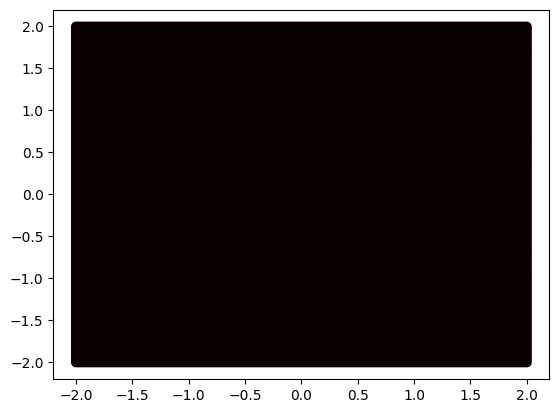

In [569]:
plt.scatter(pts[:, 0], pts[:, 1], c=out, cmap="hot")

In [570]:
W = lin2.matr

print("{")
for arr in np.sign(W.T[:, :-1]):
    print(f"\t{{ {', '.join(list(map(lambda x: str(int(x)), arr)))} }}," )
print("};\n")

# for arr in np.sign(lin1.matr.T[:, -1]):
print(f"{{ {', '.join(list(map(lambda x: str(int(x)), np.sign(W.T[:, -1]))))} }};" )


{
	{ -1, -1, -1, 1, -1 },
};

{ 1 };


In [571]:
lin1 = LinearPercepFused(2, 5, use_bias=True)
lin2 = LinearPercepFused(5, 1, use_bias=True)
lossf = MSELoss()

In [572]:
out_l1 = lin1.forward(np.array([[1, 1]]))
out = lin2.forward(out_l1)

loss = lossf.forward(out, np.array([[0]]))
print(f"{loss=}")

pass_back_grad = lossf.get_grad()
print(f"{pass_back_grad=}")
pass_back_grad = lin2.get_grad(pass_back_grad)
print(f"{pass_back_grad=}")
pass_back_grad = lin1.get_grad(pass_back_grad)
print(f"{pass_back_grad=}")

lin1.matr += lin1.grads*-LR
lin2.matr += lin2.grads*-LR
losses.append(loss)

loss=1.0
pass_back_grad=array([[1.]])
upstream_resp_loss=array([[1.]])
np.sign(self.matr.T)=array([[ 1.,  1., -1.,  1.,  1., -1.]])

dloss_din=array([[ 1.,  1., -1.,  1.,  1.]])
np.sign(dloss_din)=array([[ 1.,  1., -1.,  1.,  1.]])

self.last_xs=array([[1., 1., 1., 0., 1., 1.]])
upstream_resp_loss=array([[1.]])
dloss_dweights=array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

pass_back_grad=array([[ 1.,  1., -1.,  1.,  1.]])
upstream_resp_loss=array([[ 1.,  1., -1.,  1.,  1.]])
np.sign(self.matr.T)=array([[ 1., -1.,  1.],
       [ 1.,  1.,  1.],
       [-1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.]])

dloss_din=array([[ 3., -1.]])
np.sign(dloss_din)=array([[ 1., -1.]])

self.last_xs=array([[1., 1., 1.]])
upstream_resp_loss=array([[ 1.,  1., -1.,  1.,  1.]])
dloss_dweights=array([[ 1.,  1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.]])

pass_back_grad=array([[ 1., -1.]])


In [573]:
lin1.matr = np.array([[-1,-1,-1,1,-1],[1,-1,-1,-1,-1],[-1,1,1,-1,-1]])

In [574]:
lin2.matr = np.array([[1],[-1],[-1],[-1],[-1] ,[1]])

In [575]:
out_l1 = lin1.forward(xs, True)
lin2.forward(out_l1, True)

array([[0.],
       [1.],
       [1.],
       [1.]])

In [576]:
out_l1 = lin1.forward(np.array([[1, 1]]))
out_l1

array([[0., 0., 0., 0., 0.]])

In [577]:
out = lin2.forward(out_l1)
out

array([[1.]])

In [578]:
loss = lossf.forward(out, np.array([[0]]))
loss

1.0

In [579]:
pass_back_grad = lossf.get_grad()
print(f"{pass_back_grad=}")

pass_back_grad=array([[1.]])


In [580]:
pass_back_grad = lin2.get_grad(pass_back_grad)
print(f"{pass_back_grad=}")

upstream_resp_loss=array([[1.]])
np.sign(self.matr.T)=array([[ 1, -1, -1, -1, -1,  1]])

dloss_din=array([[ 1., -1., -1., -1., -1.]])
np.sign(dloss_din)=array([[ 1., -1., -1., -1., -1.]])

self.last_xs=array([[0., 0., 0., 0., 0., 1.]])
upstream_resp_loss=array([[1.]])
dloss_dweights=array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

pass_back_grad=array([[ 1., -1., -1., -1., -1.]])


In [581]:
pass_back_grad = lin1.get_grad(pass_back_grad)
print(f"{pass_back_grad=}")

upstream_resp_loss=array([[ 1., -1., -1., -1., -1.]])
np.sign(self.matr.T)=array([[-1,  1, -1],
       [-1, -1,  1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [-1, -1, -1]])

dloss_din=array([[1., 5.]])
np.sign(dloss_din)=array([[1., 1.]])

self.last_xs=array([[1., 1., 1.]])
upstream_resp_loss=array([[ 1., -1., -1., -1., -1.]])
dloss_dweights=array([[ 1., -1., -1., -1., -1.],
       [ 1., -1., -1., -1., -1.],
       [ 1., -1., -1., -1., -1.]])

pass_back_grad=array([[1., 1.]])


In [ ]:
raw_mat[0][0] = -1
raw_mat[0][1] = -1

raw_mat[1][0] = 1
raw_mat[1][1] = 1

raw_mat[2][0] = 1
raw_mat[2][1] = 1

raw_mat[3][0] = 1
raw_mat[3][1] = 1

raw_mat[4][0] = 1
raw_mat[4][1] = 1

# -1 1 1 1 1
# -1 1 1 1 1
# -1 1 1 1 1

raw_bias[0]= -1
raw_bias[1]= 1
raw_bias[2]= 1
raw_bias[3]= 1
raw_bias[4]= 1